In [2]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

data1Path = r'../dataset/data2a.txt'
data1Label = r'../dataset/data2alabel.txt'

dataCoords = np.loadtxt(data1Path)
dataLabels = np.loadtxt(data1Label)

In [3]:
# Make a data structure which is easier to work with
# for shuffling. 
# Also, notice we change the data labels from {0, 1} to {-1, +1}
data = list(zip(dataCoords, 2*dataLabels-1))
shuffled_data = shuffle(data)

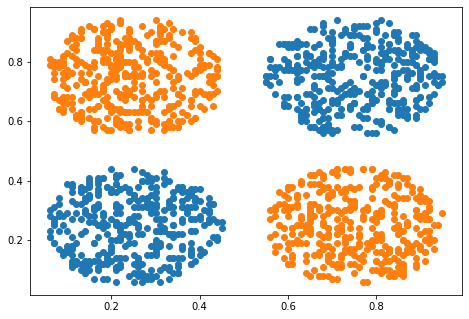

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

In [4]:
from IPython.display import Image

# Loss function Two-Qubit

Loss is calculated with a simple two-qubit gate. First, the data is embedded into Rx rotation with pi/4 rotation of Ry and Rz. The parameterized quantum circuit is placed after the embedding. We used same structure of the circuit1 from the paper to check the convergence.

In [ ]:
from circuits import *
from qiskit.circuit import Parameter

#circuit 1
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

theta=[]
for i in range(62):
    theta.append((Parameter('θ'+str(i))))
qc=circuit1(qc,qr,theta,1,0)
qc.draw('mpl')

In [ ]:
#load the simulation functcions from the quantumcircuit.py file

from quantumcircuit import *

#location,label,param,[circuit#,layer]
loss_qubitF([0.5,0.5],-1,[0,0,0,-5,0,0,0,0],[0,1])


## [SPSA method](https://en.wikipedia.org/wiki/Simultaneous_perturbation_stochastic_approximation)

SPSA is an algorithm used in numerical optimization.

Consider a loss function $L(\mathbf{x})$. In order to optimize $L$, SPSA iteratively optimizes the parameters of the loss function according to the following update rule:

$$\mathbf{y}_{n+1} = \mathbf{y}_{n} - a_{n}\widehat{\Delta L}_{n}(\mathbf{y}_{n}),$$

where $\widehat{\Delta L}_{n}(\mathbf{y}_{n}))$ is an estimate of the gradient at $\mathbf{y}_{n}$.

How SPSA calculates that gradient is by using a finite-difference rule on random perturbations of component of the parameter vector.
    $$\left( \widehat{\Delta L}_{n}(\mathbf{y}_{n}))\right)_{j} = \frac{L(\mathbf{y}_{n} + c_{n}\boldsymbol{\Delta}_{n}) - L(\mathbf{y}_{n} - c_{n}\boldsymbol{\Delta}_{n}) }{c_{n}\left(\boldsymbol{\Delta}_{n}\right)_{j}}$$
    
That is at each iteration, SPSA generates a random perturbation $\boldsymbol{\Delta}_{n}$, and does a finite-difference rule with that perturbation.

In order for the algorithm to converge, the random perturbation $\boldsymbol{\Delta}_{n}$ and finite-difference coefficients $c_{n}$ must satisfy certain properties (see the Wikipedia article linked to in the title). Importantly $c_{n}$ must tend to 0 as $n$ increases, and the size of the random fluctuations $\boldsymbol{\Delta}_{n}$ must also be bounded.

According to the wikipedia article, the coefficients $a_{n}$ and $c_{n}$ should look something like

$$c_{n} = \frac{c}{n^\gamma}~~\text{and}~~a_{n} = \frac{a}{n}.$$

In [5]:
#load the SPSA optimizer from the optimizer.py file
from optimizer import *

# Test the convergence of 100 data point

To have sanity check, we take 100 data and run the optimization.

In [14]:
c = 1
a = 1

# Do the updates
lossList = []
coeffsList = []
paramsList = []
accuracyList = []

np.random.seed(2)
currentParams = pi*np.random.uniform(size=8)
for j in range(300):      
    
    cj = c/(j+1)**(1/3)
    aj = a/(j+1)

    
    # Grab a subset of the data for minibatching
    #np.random.seed(j)
    np.random.seed(1)
    #data_ixs = np.random.choice(len(shuffled_data), size=len(shuffled_data))
    data_ixs = np.random.choice(len(data), size=100)
    
    # Evaluate the loss over that subset
    # We include a regularization term at the end 
    L = lambda x: np.sum([loss_qubitF(data[j][0],data[j][1],currentParams,[0,1]) for j in data_ixs])/len(data_ixs) + .05*np.linalg.norm(x[:2])**2
    
    lossList.append(L(currentParams))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    accuracyList.append(np.sum([predict_qubitF(data[j][0],currentParams,[0,1]) ==data[j][1] for j in data_ixs])/len(data_ixs))
    print(j,"th iteration L=",lossList[-1],"Accuracy =",accuracyList[-1])
    currentParams = SPSA_update(L, currentParams, aj, cj)     

0 th iteration L= 0.3141381245919916 Accuracy = 0.81
1 th iteration L= 0.1246520988523521 Accuracy = 0.86
2 th iteration L= 0.12033034141494538 Accuracy = 0.87
3 th iteration L= 0.198889297492379 Accuracy = 0.9
4 th iteration L= 0.17770330221436476 Accuracy = 0.9
5 th iteration L= 0.19692668753799944 Accuracy = 0.92
6 th iteration L= 0.1966126769559639 Accuracy = 0.86
7 th iteration L= 0.1961724299821767 Accuracy = 0.92
8 th iteration L= 0.19600958945248376 Accuracy = 0.91
9 th iteration L= 0.2154019285321886 Accuracy = 0.87
10 th iteration L= 0.21505050564846998 Accuracy = 0.85
11 th iteration L= 0.254759720810756 Accuracy = 0.85
12 th iteration L= 0.2548415010454784 Accuracy = 0.87
13 th iteration L= 0.25460598071683155 Accuracy = 0.82
14 th iteration L= 0.2544956503569796 Accuracy = 0.83
15 th iteration L= 0.25439838169040896 Accuracy = 0.85
16 th iteration L= 0.294153327285404 Accuracy = 0.87
17 th iteration L= 0.2540832853437544 Accuracy = 0.88
18 th iteration L= 0.274020169257178

151 th iteration L= 0.31297600230462325 Accuracy = 0.85
152 th iteration L= 0.33297427413298797 Accuracy = 0.76
153 th iteration L= 0.35296463935350925 Accuracy = 0.8
154 th iteration L= 0.31296299254813253 Accuracy = 0.86
155 th iteration L= 0.31294601755177553 Accuracy = 0.84
156 th iteration L= 0.3529444872061731 Accuracy = 0.84
157 th iteration L= 0.29293554689612683 Accuracy = 0.85
158 th iteration L= 0.3329489371263188 Accuracy = 0.81
159 th iteration L= 0.33295493479544236 Accuracy = 0.81
160 th iteration L= 0.31293856247398666 Accuracy = 0.81
161 th iteration L= 0.2929444394991864 Accuracy = 0.82
162 th iteration L= 0.37294297354621775 Accuracy = 0.79
163 th iteration L= 0.3129342964437425 Accuracy = 0.83
164 th iteration L= 0.33294734744223725 Accuracy = 0.85
165 th iteration L= 0.3329606042583897 Accuracy = 0.89
166 th iteration L= 0.31297406260783567 Accuracy = 0.82
167 th iteration L= 0.33296501946300444 Accuracy = 0.82
168 th iteration L= 0.3129635079199327 Accuracy = 0.82

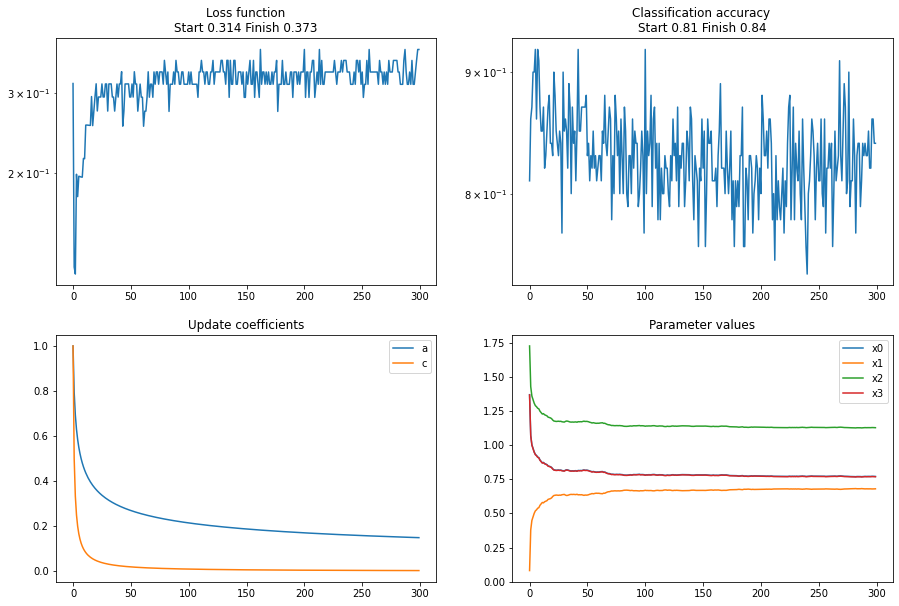

In [15]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(lossList)
ax.set_title('Loss function\nStart {0} Finish {1}'.format(np.round(lossList[0], 3), np.round(lossList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 2)
ax.plot(accuracyList)
ax.set_title('Classification accuracy \nStart {0} Finish {1}'.format(np.round(accuracyList[0], 3), np.round(accuracyList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 3)
ax.plot([c[0] for c in coeffsList], label='a')
ax.plot([c[1] for c in coeffsList], label='c')
ax.legend(loc=0)
ax.set_title('Update coefficients')

ax = fig.add_subplot(2, 2, 4)
for j in range(4):
    ax.plot([X[j] for X in paramsList], label='x{0}'.format(j))
ax.legend(loc=0)
ax.set_title('Parameter values')
ax.legend(loc=0)

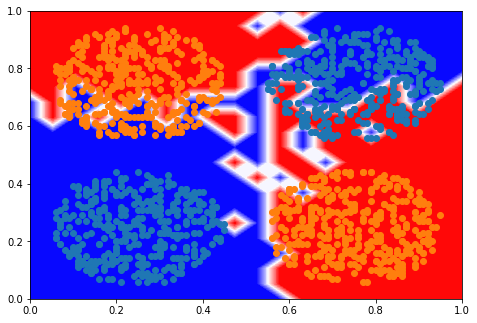

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

X = np.linspace(0, 1, num=20)
Z = np.zeros((len(X), len(X)))

# Contour map
for j in range(len(X)):
    for k in range(len(X)):
        # Fill Z with the labels (numerical values)
        # the inner loop goes over the columns of Z,
        # which corresponds to sweeping x-values
        # Therefore, the role of j,k is flipped in the signature
        Z[j, k] = predict_qubitF( np.array([X[k], X[j]]),currentParams,[0,1])
        
ax.contourf(X, X, Z, cmap='bwr', levels=30)

# 1

In [70]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

data1Path = r'../dataset/data1a.txt'
data1Label = r'../dataset/data1alabel.txt'

dataCoords = np.loadtxt(data1Path)
dataLabels = np.loadtxt(data1Label)

In [71]:
# Make a data structure which is easier to work with
# for shuffling. 
# Also, notice we change the data labels from {0, 1} to {-1, +1}
data = list(zip(dataCoords, 2*dataLabels-1))
shuffled_data = shuffle(data)

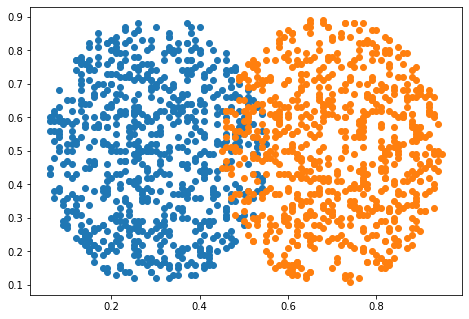

In [72]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

In [77]:
c = 1
a = 1

# Do the updates
lossList = []
coeffsList = []
paramsList = []
accuracyList = []

np.random.seed(2)
currentParams = pi*np.random.uniform(size=8)
for j in range(300):      
    
    cj = c/(j+1)**(1/5)
    aj = a/(j+1)**(1/2)
    
    # Grab a subset of the data for minibatching
    #np.random.seed(j)
    np.random.seed(1)
    #data_ixs = np.random.choice(len(shuffled_data), size=len(shuffled_data))
    data_ixs = np.random.choice(len(data), size=100)
    
    # Evaluate the loss over that subset
    # We include a regularization term at the end 
    L = lambda x: np.sum([loss_qubitF(data[j][0],data[j][1],currentParams,[0,1]) for j in data_ixs])/len(data_ixs) + .05*np.linalg.norm(x[:2])**2
    
    lossList.append(L(currentParams))
    coeffsList.append((cj, aj))
    paramsList.append(currentParams)
    accuracyList.append(np.sum([predict_qubitF(data[j][0],currentParams,[0,1]) ==data[j][1] for j in data_ixs])/len(data_ixs))
    print(j,"th iteration L=",lossList[-1],"Accuracy =",accuracyList[-1])
    currentParams = SPSA_update(L, currentParams, aj, cj)     

0 th iteration L= 1.1941381245919918 Accuracy = 0.5
1 th iteration L= 0.8660780213189035 Accuracy = 0.63
2 th iteration L= 0.7812429317935382 Accuracy = 0.7
3 th iteration L= 0.6574631443899193 Accuracy = 0.68
4 th iteration L= 0.6557980902403893 Accuracy = 0.73
5 th iteration L= 0.5953141161232266 Accuracy = 0.7
6 th iteration L= 0.6749703824689954 Accuracy = 0.66
7 th iteration L= 0.5943007836771746 Accuracy = 0.68
8 th iteration L= 0.6345050859088903 Accuracy = 0.67
9 th iteration L= 0.6547087115791531 Accuracy = 0.68
10 th iteration L= 0.6542143901194177 Accuracy = 0.69
11 th iteration L= 0.6145716856375826 Accuracy = 0.74
12 th iteration L= 0.6744455260322575 Accuracy = 0.71
13 th iteration L= 0.6339316732452394 Accuracy = 0.66
14 th iteration L= 0.6537444841315175 Accuracy = 0.61
15 th iteration L= 0.6135841092569051 Accuracy = 0.68
16 th iteration L= 0.673634723566617 Accuracy = 0.7
17 th iteration L= 0.6135887993896059 Accuracy = 0.66
18 th iteration L= 0.6337352103870294 Accur

152 th iteration L= 0.6930650802344867 Accuracy = 0.7
153 th iteration L= 0.7130840090641816 Accuracy = 0.69
154 th iteration L= 0.6330402869602675 Accuracy = 0.68
155 th iteration L= 0.6530382608302466 Accuracy = 0.78
156 th iteration L= 0.6330362580486552 Accuracy = 0.77
157 th iteration L= 0.5930342781996194 Accuracy = 0.68
158 th iteration L= 0.6130323208772546 Accuracy = 0.7
159 th iteration L= 0.6129921196704866 Accuracy = 0.69
160 th iteration L= 0.6530091724375131 Accuracy = 0.72
161 th iteration L= 0.6330462075799947 Accuracy = 0.7
162 th iteration L= 0.6130642886503375 Accuracy = 0.69
163 th iteration L= 0.6331250043808778 Accuracy = 0.67
164 th iteration L= 0.6730602592454981 Accuracy = 0.7
165 th iteration L= 0.6330385368461502 Accuracy = 0.67
166 th iteration L= 0.6530763655225217 Accuracy = 0.7
167 th iteration L= 0.6730743121836449 Accuracy = 0.7
168 th iteration L= 0.6130329927916955 Accuracy = 0.73
169 th iteration L= 0.6130123396859063 Accuracy = 0.76
170 th iteration

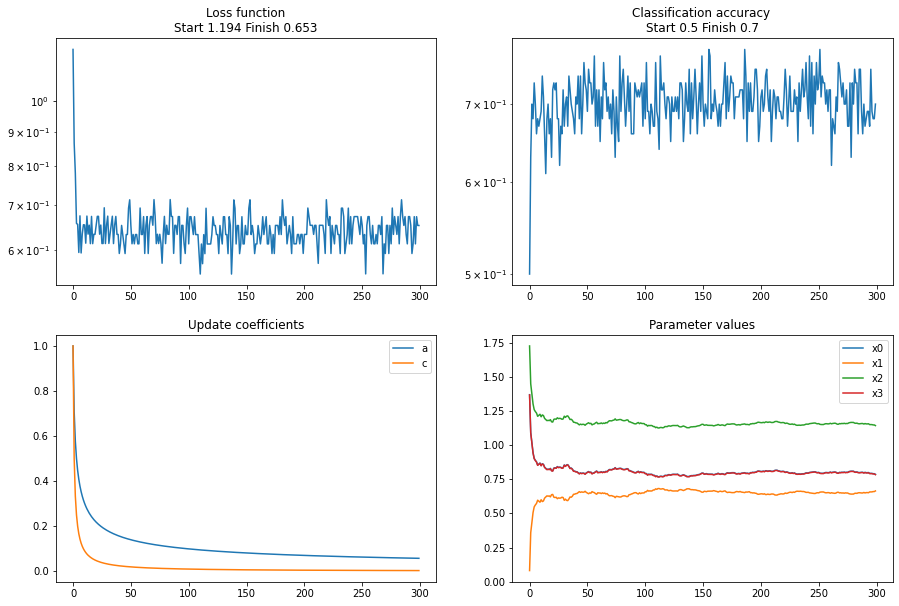

In [78]:
fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(2, 2, 1)
ax.plot(lossList)
ax.set_title('Loss function\nStart {0} Finish {1}'.format(np.round(lossList[0], 3), np.round(lossList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 2)
ax.plot(accuracyList)
ax.set_title('Classification accuracy \nStart {0} Finish {1}'.format(np.round(accuracyList[0], 3), np.round(accuracyList[-1], 3)))
ax.set_yscale('log')

ax = fig.add_subplot(2, 2, 3)
ax.plot([c[0] for c in coeffsList], label='a')
ax.plot([c[1] for c in coeffsList], label='c')
ax.legend(loc=0)
ax.set_title('Update coefficients')

ax = fig.add_subplot(2, 2, 4)
for j in range(4):
    ax.plot([X[j] for X in paramsList], label='x{0}'.format(j))
ax.legend(loc=0)
ax.set_title('Parameter values')
ax.legend(loc=0)

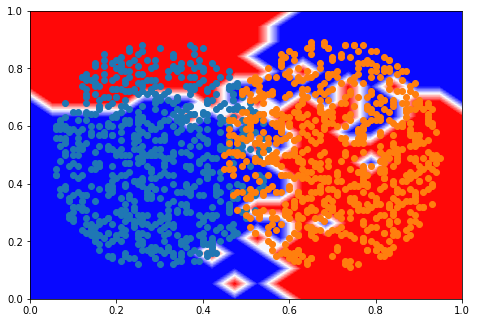

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.ravel(dataCoords[np.where(dataLabels == 0)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 0)])[1::2], ls='', marker='o')

ax.plot(np.ravel(dataCoords[np.where(dataLabels == 1)])[::2],
np.ravel(dataCoords[np.where(dataLabels == 1)])[1::2], ls='', marker='o')

X = np.linspace(0, 1, num=20)
Z = np.zeros((len(X), len(X)))

# Contour map
for j in range(len(X)):
    for k in range(len(X)):
        # Fill Z with the labels (numerical values)
        # the inner loop goes over the columns of Z,
        # which corresponds to sweeping x-values
        # Therefore, the role of j,k is flipped in the signature
        Z[j, k] = predict_qubitF( np.array([X[k], X[j]]),currentParams,[0,1])
        
ax.contourf(X, X, Z, cmap='bwr', levels=30)